# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [6]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
#birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [11]:
birddata.groupby(['bird_name']).mean()

,altitude,device_info_serial,direction,latitude,longitude,speed_2d
bird_name,,,,,,
Eric,60.249406,851.0,-7.774162,39.055123,-4.409152,2.300545
Nico,67.900478,864.0,-4.074570,31.084068,-8.311241,2.908726
Sanne,29.159922,833.0,-2.150073,21.047431,-13.881717,2.450434


In [13]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")


# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [20]:
import datetime
dates = []
for k in range(len(birddata)):
    dates.append(datetime.datetime.strptime\
                     (birddata.date_time.iloc[k][:-12], "%Y-%m-%d"))
    

In [31]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata['date_time'].dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [34]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
                 ...    
2014-04-01    115.797571
2014-04-02     13.589431
2014-04-03     26.772727
2014-04-04    101.441667
2014-04-05     96.995536
2014-04-06     13.426540
2014-04-07     27.105000
2014-04-08      9.597087
2014-04-09     22.84

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [36]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby([birddata.bird_name, birddata.date])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

In [37]:
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
           2013-08-20    101.792683
           2013-08-21    160.518072
           2013-08-22     99.674699
           2013-08-23    122.710843
           2013-08-24    119.674699
           2013-08-25    108.500000
           2013-08-26     77.107143
           2013-08-27    108.809524
           2013-08-28    134.464286
           2013-08-29    138.172840
           2013-08-30    131.226190
           2013-08-31     63.166667
           2013-09-01    106.765432
           2013-09-02    106.975904
           2013-09-03    145.353659
           2013-09-04    129.253012
           2013-09-05    112.380952
           2013-09-06    123.952381
           2013-09-07    120.325301
           2013-09-08    112.702381
           2013-09-09    144.060241
           2013-09-10    121.785714
      

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

In [43]:
#birddata[birddata.bird_name == 'Nico'].groupby('date').speed_2d.mean()

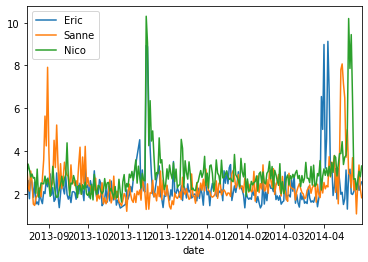

In [40]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()['Eric']
sanne_daily_speed = grouped_birdday.speed_2d.mean()['Sanne']
nico_daily_speed  = grouped_birdday.speed_2d.mean()['Nico']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [44]:
nico_daily_speed

date
2013-08-15     2.856924
2013-08-16     3.386387
2013-08-17     3.123210
2013-08-18     2.785776
2013-08-19     2.920577
2013-08-20     2.730114
2013-08-21     2.759074
2013-08-22     2.020524
2013-08-23     3.152283
2013-08-24     1.840692
2013-08-25     2.154902
2013-08-26     2.506818
2013-08-27     2.476388
2013-08-28     2.462865
2013-08-29     2.823951
2013-08-30     2.445771
2013-08-31     2.725194
2013-09-01     2.480032
2013-09-02     1.876902
2013-09-03     2.276983
2013-09-04     3.282450
2013-09-05     2.507296
2013-09-06     1.989307
2013-09-07     1.832832
2013-09-08     1.857287
2013-09-09     2.198939
2013-09-10     2.434254
2013-09-11     2.819172
2013-09-12     2.361830
2013-09-13     2.713215
                ...    
2014-04-01     3.163723
2014-04-02     2.861222
2014-04-03     3.212099
2014-04-04     2.832465
2014-04-05     3.283842
2014-04-06     2.824700
2014-04-07     3.455989
2014-04-08     2.995421
2014-04-09     3.780186
2014-04-10     3.703409
2014-04-11 